Select a stock from the following list:
['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB', 'SPY']


Enter the symbol of the stock:  AAPL
Enter the number of years you want to do MCSimulation:  3
Enter the initial investment:  1000


[*********************100%***********************]  1 of 1 completed


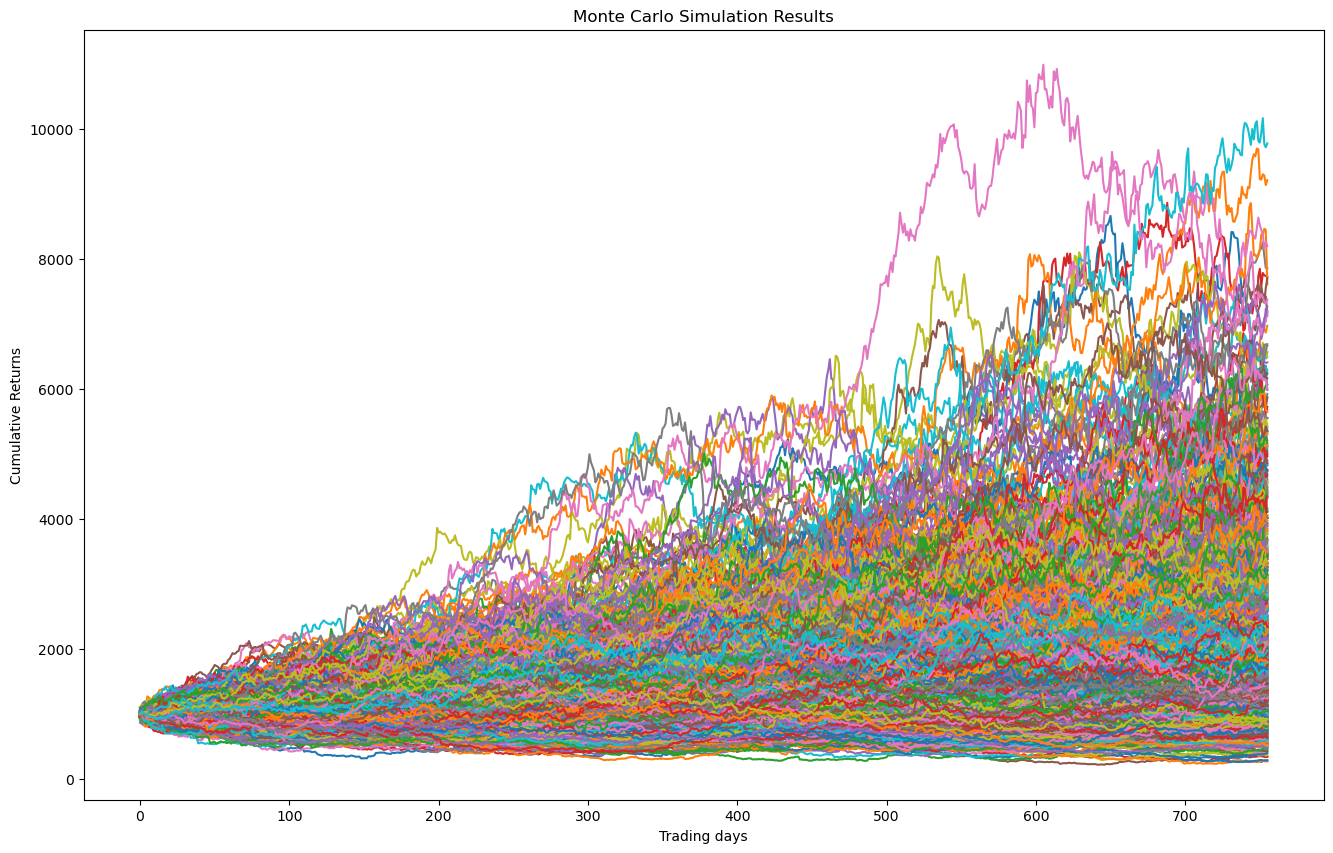

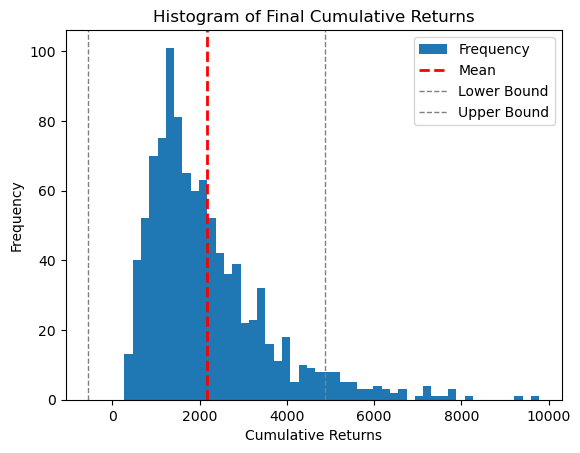

                    Value
count         1000.000000
mean          2167.080549
std           1385.352447
min            275.083201
25%           1226.097163
50%           1808.742212
75%           2748.529095
max           9785.197784
95% CI Lower  -548.210247
95% CI Upper  4882.371344


In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf     
import numpy as np
import matplotlib.pyplot as plt


# Let user choose the symbol of the ticker.
stock_list = ["AAPL", "MSFT", "GOOG", "AMZN", "FB", "SPY"]
print("Select a stock from the following list:")
print(stock_list)
selected_stock = input("Enter the symbol of the stock: ")

# Let user choose the number of years for MCSimulation, hence get the period for MCSimulation.
num_years = int(input("Enter the number of years you want to do MCSimulation: "))

# Let user input how much money he or she would like to invest
initial_investment = float(input("Enter the initial investment: "))  

# Get the data of the selected ticker from yahoo
mc_end = dt.date.today()
mc_start = mc_end - dt.timedelta(days=365*num_years)
yf.pdr_override()
stock_data = pdr.get_data_yahoo(selected_stock, mc_start, mc_end)
     
# prepare parameters for MCSimulation
daily_returns = stock_data['Close'].pct_change().dropna().values # Calculate daily returns
trading_days = 252 * num_years # Number of trading days to simulate
num_simulations = 1000 # Number of MC simulations to run
    

def cal_cumulative_return(daily_returns, initial_investment):
    """
    This function takes in daily returns and initial investment and returns cumulative returns of all the simulations
    """
    # Calculate cumulative returns using the initial investment
    cumulative_returns = initial_investment * (1 + daily_returns).cumprod(axis=0)
    return cumulative_returns

# Calculate cumulative returns for each simulation
cumulative_returns = np.zeros((trading_days, num_simulations))
for i in range(num_simulations):
    daily_returns_random = np.random.choice(daily_returns, trading_days, replace=True)
    cumulative_returns[:, i] = cal_cumulative_return(daily_returns_random, initial_investment)

# Create a DataFrame of the cumulative returns
cumulative_returns_df = pd.DataFrame(cumulative_returns, columns=[f"Simulation {i}" for i in range(num_simulations)])

# plot Monte Carlo Simulation Results
plt.figure(figsize=(16, 10))
for i in range(num_simulations):
    plt.plot(cumulative_returns_df.index, cumulative_returns_df[f"Simulation {i}"])

plt.xlabel('Trading days')
plt.ylabel('Cumulative Returns')
plt.title('Monte Carlo Simulation Results')
plt.show()

# plot histogram 
plt.hist(cumulative_returns[-1, :], bins=50, density=False, label="Frequency")
plt.xlabel("Cumulative Returns")
plt.ylabel("Frequency")
plt.title("Histogram of Final Cumulative Returns")

# prepare parameters for mean and 95% confidence interval
mean = np.mean(cumulative_returns[-1, :])
std = np.std(cumulative_returns[-1, :])
lower_bound = mean - 1.96 * std
upper_bound = mean + 1.96 * std

# Plot the mean and confidence interval as vertical lines
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(lower_bound, color='gray', linestyle='dashed', linewidth=1, label='Lower Bound')
plt.axvline(upper_bound, color='gray', linestyle='dashed', linewidth=1, label='Upper Bound')

plt.title("Histogram of Final Cumulative Returns")
plt.legend()
plt.show()

def summarize_cumulative_return(cumulative_returns):
    summary = {}
    summary['count'] = cumulative_returns.shape[1]
    summary['mean'] = cumulative_returns[-1].mean()
    summary['std'] = cumulative_returns[-1].std()
    summary['min'] = cumulative_returns[-1].min()
    summary['25%'] = np.percentile(cumulative_returns[-1, :], 25)
    summary['50%'] = np.percentile(cumulative_returns[-1, :], 50)
    summary['75%'] = np.percentile(cumulative_returns[-1, :], 75)
    summary['max'] = cumulative_returns[-1].max()
    summary['95% CI Lower'] = lower_bound
    summary['95% CI Upper'] = upper_bound
    return pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])

print(summarize_cumulative_return(cumulative_returns))


In [3]:
cumulative_returns_df.head()

,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
0,1003.077161,993.972784,984.036378,1019.337567,979.732359,1028.013287,979.732359,974.484118,944.283823,984.036378,...,1003.427943,993.421742,1005.036658,961.371323,1013.275562,1003.781794,998.073754,990.741465,1008.784629,1020.918944
1,1019.676504,990.638969,957.571492,1004.294309,996.074482,1102.052421,1041.965510,960.840836,915.918201,983.416646,...,994.761915,985.769759,1003.135677,995.493957,995.397315,969.781518,979.798478,977.256385,1022.451522,1046.011001
2,1025.941082,989.369460,951.272340,998.555130,990.318727,1074.093366,1037.187554,963.206668,923.459522,982.323966,...,980.834733,960.591356,1033.984640,979.357560,972.473946,980.195395,979.876324,983.389784,1031.278861,1036.224767
3,1001.730062,992.694848,963.611632,933.281373,969.800878,1064.117884,1027.269892,966.032247,938.715166,948.156170,...,967.297572,960.050301,1071.888768,977.113206,948.510833,990.059158,981.953382,975.402690,1032.068018,1005.404737
4,1001.144070,1002.247172,887.397578,927.261180,955.133781,1024.420987,1027.899535,973.653535,924.509335,924.792281,...,995.364108,972.241363,1146.682668,969.312743,982.177001,964.796925,969.870513,979.918274,1033.871340,1003.364698
